
<!DOCTYPE html>
<html>
<head>
    <style>
        .center-image {
            display: block;
            margin: 0 auto;
        }
    </style>
</head>
<body>
    <img src="https://www.probabilidadyestadistica.net/wp-content/uploads/2023/07/arbol-de-decisiones-.png" alt="ilustracion" class="center-image">
</body>
</html>





### Modelo de Machine Learning Arboles de Desiciones

En este Notebook se detallaran los pasos y componentes matematicos para poder realizar un algoritmo de Machine learning llamado arbol de decicion. este note es complemento del articuclo del blog Nodo Data. Realizaremos un modelado programando las formulas matematicas para poder obtener los resultados y luego realizaremos el modelo de ya programado de la biblioteca. Espero encuentres este Note ilustrativo y Enriquecedor. No dudes en hacerme llegar tus comentarios e inquietudes. desde ya gracias por tu tiempo.

## Importación de bibliotecas
Comenzaremos importando las bibliotecas necesarias para nuestro análisis y modelo.

In [3]:
# librerías necesarias:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

## Carga de datos
A continuación, procedemos con la carga de datos para nuestro análisis. Los datos provienen de la plataforma Kaggle. Puedes acceder a ellos [aquí](https://www.kaggle.com/datasets/dragonheir/logistic-regression). Estos datos ya han sido analizados y visualizados en el notebook de regresión logística. Dado que tenemos un conocimiento previo de los datos y que estos son utilizados únicamente para práctica y explicación de conceptos, procederemos con la implementación directa del árbol de decisión.

In [4]:
# Carga de Datos
df = pd.read_csv("Social_Network_Ads.csv")

## Consistencia de datos

In [5]:
# Informacion estructural de nuestros datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.describe(include= 'all')

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


In [7]:
# Elminamos la columna que no nos sirve
df = df.drop(['User ID'],axis=1)

In [8]:
# Conclusiones:

#- Se cuenta con un total de 400 registros, cada uno representando a una persona distinta identificada por un identificador único.
#- De las 5 variables disponibles, 4 son relevantes para nuestro análisis, ya que una de ellas corresponde al identificador único. Las variables incluyen:

#- Gender: Variable categórica nominal que representa el género de la persona.
#- Age: Variable numérica discreta que indica la edad de la persona.
#- EstimatedSalary: Variable numérica continua que representa el salario estimado de la persona.
#- Purchased: Variable dicotómica que sirve como variable objetivo a predecir, indicando si la persona realizó una compra o no.

In [9]:
# Valores nuelos en nuestros datos
nulo = df.isnull().sum()
print(nulo)

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [10]:
# Conclusiones:

#- Después de realizar un Vision inicial de los datos, se observa que no se encuentran valores nulos en las columnas de interés.
#- Todos los valores parecen ser válidos y no requieren un tratamiento especial en esta etapa del análisis.

In [11]:
# Variable Objetivo
print(df['Purchased'].value_counts())


Purchased
0    257
1    143
Name: count, dtype: int64


In [12]:
#- Conclusiones:
#- Se ha realizado un análisis de la variable objetivo 'Purchased', la cual presenta dos valores posibles: 1 (realizó la compra)
#- y 0 (no realizó la compra). Es importante destacar que se observa un desbalance en los datos, lo cual puede ocasionar
#- problemas en la construcción del modelo predictivo. 

#- Para ilustrar este punto, consideremos un ejemplo hipotético: supongamos que tenemos 100 fotos, de las cuales 90 son de autos
#- y 10 son de motos. Si entrenamos un modelo para identificar si en una foto hay un auto o una moto, y dado el desbalance de clases,
#- es posible que el modelo clasifique todas las fotos como autos para maximizar su precisión. Aunque este modelo tendría una alta precisión
#- (90%), en realidad no está aprendiendo a distinguir entre autos y motos, sino que simplemente está prediciendo la clase mayoritaria.

#- Por lo tanto, es fundamental abordar el desbalance de clases en los datos para evitar sesgos en el modelo y garantizar su capacidad de generalización.

In [13]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [14]:
# Cambio de nombres de las variables
nuevos = {
    "Gender":"genero",
    "Age":"edad",
    "EstimatedSalary": "salario_estimado",
    "Purchased":"compro"
}

df = df.rename(columns=nuevos)

<div style="width: 100%; height: 200px; background-color: #22577a; border-radius: 20px; display: flex; justify-content: center; align-items: center; color: white; font-size: 24px; font-weight: bold; letter-spacing: 2px;">
  CREACION MANUAL DEL ARBOL
</div>

A continuación, procederemos a programar un modelo teniendo en cuenta las fórmulas y conceptos descritos en el blog. Una vez que tengamos la implementación, compararemos brevemente sus métricas con las del modelo de la biblioteca **`sklearn`** y el modelo manual. El propósito de este ejercicio es demostrar cómo las fórmulas matemáticas y los conceptos subyacentes nos ayudan a comprender los diferentes modelos y conceptos del aprendizaje automático.

In [15]:
# Función para calcular la entropía de un conjunto de etiquetas
def entropy(y):
    counter = Counter(y)  # Cuenta la frecuencia de cada etiqueta
    total = len(y)  # Total de elementos
    ent = 0.0
    for count in counter.values():  # Iteramos sobre las frecuencias de las etiquetas
        prob = count / total  # Calculamos la probabilidad de cada etiqueta
        ent -= prob * np.log2(prob)  # Calculamos la entropía
    return ent

# Función para calcular la ganancia de información de una característica
def information_gain(X, y, feature):
    parent_entropy = entropy(y)  # Entropía del nodo padre
    values, counts = np.unique(X[:, feature], return_counts=True)  # Valores únicos y sus cuentas en la característica
    weighted_entropy = 0.0
    
    # Calculamos la entropía ponderada de los nodos hijos
    for value, count in zip(values, counts):
        child_y = y[X[:, feature] == value]  # Subconjunto de etiquetas para el valor específico de la característica
        weighted_entropy += (count / len(y)) * entropy(child_y)  # Entropía ponderada
    
    return parent_entropy - weighted_entropy  # Retornamos la ganancia de información

# Función para encontrar la mejor característica para dividir el conjunto de datos
def best_split(X, y):
    best_gain = 0  # Inicializamos la mejor ganancia
    best_feature = None  # Inicializamos la mejor característica
    for feature in range(X.shape[1]):  # Iteramos sobre todas las características
        gain = information_gain(X, y, feature)  # Calculamos la ganancia de información para la característica actual
        if gain > best_gain:  # Si la ganancia es mejor que la anterior mejor
            best_gain = gain
            best_feature = feature  # Actualizamos la mejor característica
    return best_feature  # Retornamos la mejor característica

# Clase para representar un nodo en el árbol de decisión
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature  # Característica sobre la cual se divide
        self.threshold = threshold  # Umbral de división
        self.left = left  # Nodo hijo izquierdo
        self.right = right  # Nodo hijo derecho
        self.value = value  # Valor si es un nodo hoja

    # Método para verificar si el nodo es hoja
    def is_leaf_node(self):
        return self.value is not None

def build_tree(X, y, depth=0, max_depth=7, min_samples_split=2, min_samples_leaf=1):
    num_samples, num_features = X.shape  # Número de muestras y características
    if num_samples >= min_samples_split and depth <= max_depth:  # Condiciones de parada
        best_feature = best_split(X, y)  # Encontramos la mejor característica para dividir
        if best_feature is not None:
            values = np.unique(X[:, best_feature])  # Valores únicos de la mejor característica
            if len(values) > 1:
                threshold = np.mean(values)  # Umbral de división como la media de los valores únicos
                left_indices = X[:, best_feature] <= threshold  # Índices para la rama izquierda
                right_indices = X[:, best_feature] > threshold  # Índices para la rama derecha
                left = build_tree(X[left_indices], y[left_indices], depth + 1, max_depth, min_samples_split, min_samples_leaf)  # Construimos recursivamente el subárbol izquierdo
                right = build_tree(X[right_indices], y[right_indices], depth + 1, max_depth, min_samples_split, min_samples_leaf)  # Construimos recursivamente el subárbol derecho
                return Node(best_feature, threshold, left, right)  # Retornamos el nodo con sus hijos
    return Node(value=Counter(y).most_common(1)[0][0])  # Retornamos un nodo hoja con el valor más común si no se puede dividir más


# Función para predecir la etiqueta de una muestra individual
def predict_sample(node, sample):
    if node.is_leaf_node():  # Si el nodo es hoja, retornamos su valor
        return node.value
    if sample[node.feature] <= node.threshold:  # Si la característica de la muestra es menor o igual al umbral
        return predict_sample(node.left, sample)  # Recorremos la rama izquierda
    return predict_sample(node.right, sample)  # Recorremos la rama derecha

# Función para predecir las etiquetas de un conjunto de datos
def predict(node, X):
    return [predict_sample(node, sample) for sample in X]  # Aplicamos predict_sample a cada muestra en X

# Función para calcular la precisión del modelo
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)  # Proporción de predicciones correctas


<div style="text-align: center; font-size: 24px; font-weight: bold;">
 EXPLICACION
</div>




## **Entropía:**
 Se utiliza en la función `entropy(y)` para calcular la entropía de un conjunto de etiquetas `y`.


$$
E(S) = -\sum_{i=1}^{c} p_{i} \log_2(p_{i})
$$

Mide la cantidad de desorden o impureza en un conjunto de datos. 𝑝𝑖 representa la proporción de la clase 𝑖
en el conjunto de datos. La entropía varía de 0 (completa pureza) a 1 (máxima impureza).

## **Ganancia de Información:**
Se utiliza en la función `information_gain(X, y, feature)` para calcular la ganancia de información de una característica `feature` en un conjunto de datos `X` con etiquetas `y`.

$$
\text{Ganancia}(S, A) = E(S) - \sum_{v \in \text{Valores}(A)} \left( \frac{|S_{v}|}{|S|} E(S_{v}) \right)
$$

Mide la reducción en la entropía al dividir un conjunto de datos 𝑆 sobre un atributo 𝐴. Se calcula restando la entropía del nodo padre 𝐸(𝑆) de la suma ponderada de las entropías de los nodos hijos 𝑆𝑣.


## **Índice de Gini:**
Aunque no está implementado explícitamente en el código proporcionado, se podría utilizar en una función similar a `entropy(y)` para calcular el índice de Gini de un conjunto de etiquetas `y`.


$$
Gini(S) = 1 - \sum_{i=1}^{c} P_{i}^{2}
$$

Mide la impureza de un conjunto de datos. Se calcula como 1 menos la suma de los cuadrados de las proporciones de cada clase en el conjunto de datos. El índice de Gini varía de 0 (completa pureza) a 0.5 (máxima impureza en un conjunto de dos clases igualmente distribuidas).

## **Disminución de la Impureza de Gini**:
Aunque tampoco está implementado explícitamente en el código proporcionado, se podría utilizar en una función similar a `information_gain(X, y, feature)` para calcular la disminución de la impureza de Gini al dividir un conjunto de datos `X` sobre una característica `feature`.

$$
\Delta Gini(S, A) = Gini(S) - \sum_{v \in \text{Valores}(A)} \left( \frac{|S_{v}|}{|S|} Gini(S_{v}) \right)
$$

Mide la reducción en la impureza de Gini al dividir un conjunto de datos 𝑆 sobre un atributo 𝐴. Se calcula restando el índice de Gini del nodo padre 𝐺𝑖𝑛𝑖(𝑆) de la suma ponderada de los índices de Gini de los nodos hijos 𝑆𝑣.

Estas funciones son utilizadas en el proceso de construcción del árbol de decisión para evaluar la mejor característica para dividir el conjunto de datos en cada paso. La función `best_split(X, y)` utiliza la ganancia de información para encontrar la mejor característica, y luego se utiliza en la función `build_tree(X, y, depth=0, max_depth=7)` para construir el árbol recursivamente.

<div style="width: 100%; height: 200px; background-color: #38a3a5; border-radius: 20px; display: flex; justify-content: center; align-items: center; color: white; font-size: 24px; font-weight: bold; letter-spacing: 2px;">
  MODELOS: SKLEARN VS MANUAL
</div>

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Preprocesar los datos
# Convertir la variable categórica 'Gender' en numérica
df['genero'] = df['genero'].map({'Male': 0, 'Female': 1})

# Separar las características y la variable objetivo
X = df[['genero', 'edad', 'salario_estimado']]
y = df['compro']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir X_train y X_test a matrices NumPy
X_train_np = X_train.values
X_test_np = X_test.values

# Entrenar el modelo de árbol de decisión manual
tree = build_tree(X_train_np, y_train, max_depth=5)

# Hacer predicciones y evaluar el modelo manual
y_pred_train_manual = predict(tree, X_train_np)
y_pred_test_manual = predict(tree, X_test_np)
accuracy_train_manual = accuracy(y_train, y_pred_train_manual)
accuracy_test_manual = accuracy(y_test, y_pred_test_manual)

print("Precisión en entrenamiento (manual):", accuracy_train_manual)
print("Precisión en prueba (manual):", accuracy_test_manual)

# Entrenar el modelo de árbol de decisión de sklearn
clf = DecisionTreeClassifier(
    criterion='entropy',       # Usar ganancia de información en lugar de impureza de Gini
    splitter='best',           # Usar la mejor división
    max_depth=5,               # Limitar la profundidad máxima del árbol a 5
    min_samples_split=10,      # Requerir al menos 10 muestras para dividir un nodo
    min_samples_leaf=5,        # Requerir al menos 5 muestras en un nodo hoja
    max_features='sqrt',       # Considerar la raíz cuadrada del número de características
    random_state=20            # Fijar la semilla para la reproducibilidad
)
clf.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo de sklearn
y_pred_train_sklearn = clf.predict(X_train)
y_pred_test_sklearn = clf.predict(X_test)
accuracy_train_sklearn = accuracy(y_train, y_pred_train_sklearn)
accuracy_test_sklearn = accuracy(y_test, y_pred_test_sklearn)

print("Precisión en entrenamiento (sklearn):", accuracy_train_sklearn)
print("Precisión en prueba (sklearn):", accuracy_test_sklearn)


Precisión en entrenamiento (manual): 0.940625
Precisión en prueba (manual): 0.925
Precisión en entrenamiento (sklearn): 0.928125
Precisión en prueba (sklearn): 0.9375


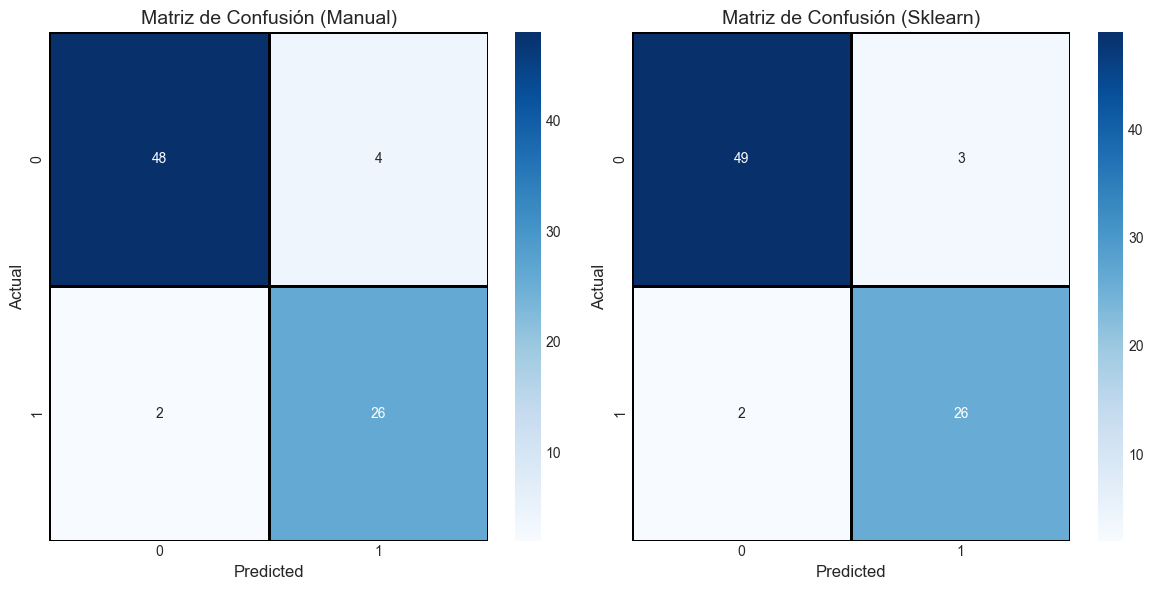

In [34]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión para el modelo manual
cm_manual = confusion_matrix(y_test, y_pred_test_manual)

# Calcular la matriz de confusión para el modelo de sklearn
cm_sklearn = confusion_matrix(y_test, y_pred_test_sklearn)

# Crear subplots para mostrar ambas matrices de confusión
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Matriz de confusión para el modelo manual
sns.heatmap(cm_manual, annot=True, fmt='d', cmap='Blues', ax=ax[0], cbar=True, linewidths=1, linecolor='black')
ax[0].set_title('Matriz de Confusión (Manual)', fontsize=14)
ax[0].set_xlabel('Predicted', fontsize=12)
ax[0].set_ylabel('Actual', fontsize=12)

# Matriz de confusión para el modelo de sklearn
sns.heatmap(cm_sklearn, annot=True, fmt='d', cmap='Blues', ax=ax[1], cbar=True, linewidths=1, linecolor='black')
ax[1].set_title('Matriz de Confusión (Sklearn)', fontsize=14)
ax[1].set_xlabel('Predicted', fontsize=12)
ax[1].set_ylabel('Actual', fontsize=12)

plt.tight_layout()
plt.show()

plt.show()


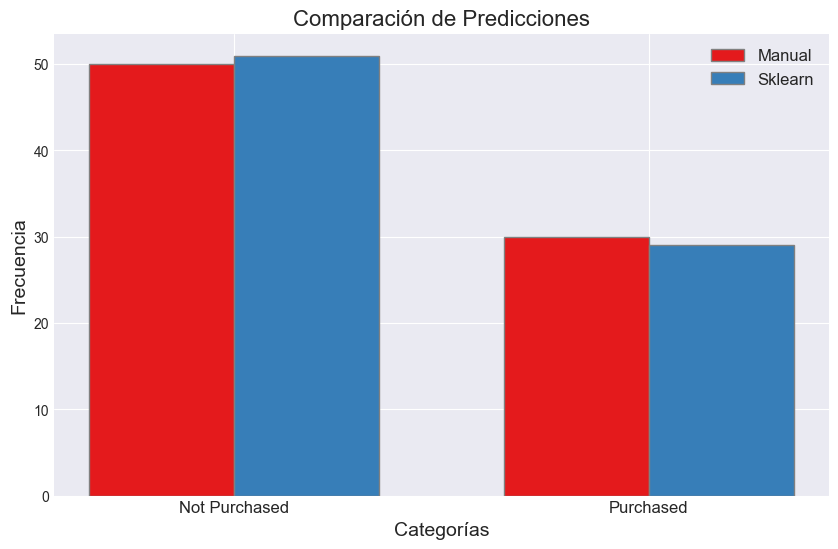

In [27]:
# Grafico de barras
categorias = ['Not Purchased', 'Purchased']
predicciones_manual = np.bincount(y_pred_test_manual)
predicciones_sklearn = np.bincount(y_pred_test_sklearn)

# Configuración de estilo
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))
barWidth = 0.35
r1 = np.arange(len(categorias))
r2 = [x + barWidth for x in r1]

# Gráfico de barras para las predicciones del modelo manual
ax.bar(r1, predicciones_manual, color=palette(0), width=barWidth, edgecolor='grey', label='Manual')
# Gráfico de barras para las predicciones del modelo de sklearn
ax.bar(r2, predicciones_sklearn, color=palette(1), width=barWidth, edgecolor='grey', label='Sklearn')

# Etiquetas y título
ax.set_xlabel('Categorías', fontsize=14)
ax.set_ylabel('Frecuencia', fontsize=14)
ax.set_title('Comparación de Predicciones', fontsize=16)

# Eje x
ax.set_xticks([r + barWidth/2 for r in range(len(categorias))])
ax.set_xticklabels(categorias, fontsize=12)

# Leyenda
ax.legend(fontsize=12)

# Mostrar el gráfico
plt.show()


## **CONCLUSIONES:**

En este notebook, hemos explorado los conceptos fundamentales y la implementación práctica de los árboles de decisión en Python. Los árboles de decisión son modelos de aprendizaje automático poderosos y fáciles de interpretar que se utilizan en una variedad de aplicaciones, desde la clasificación hasta la regresión.

Comenzamos comprendiendo los conceptos básicos, como la entropía, la ganancia de información y el índice de Gini, que son fundamentales para la construcción de árboles de decisión. Luego, implementamos un árbol de decisión desde cero utilizando Python, lo que nos permitió comprender mejor cómo funciona el modelo detrás de escena.

Además, utilizamos la biblioteca sklearn para construir otro árbol de decisión y comparamos su rendimiento con nuestro modelo manual. Observamos que ambos modelos tuvieron un rendimiento similar en un conjunto de datos de ejemplo, lo que valida la efectividad de los árboles de decisión y la implementación correcta de los conceptos fundamentales.

En conclusión, los árboles de decisión son una herramienta poderosa en el campo del aprendizaje automático, y comprender los conceptos detrás de ellos es esencial para aprovechar al máximo estos modelos. Espero que este notebook haya sido útil para comprender y aplicar los árboles de decisión en Python. ¡Gracias por tu tiempo! 👽